In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2


In [26]:
data = pd.read_csv("../data/raw.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Số lần nhân bản và tạo ảnh nhiễu
n_augmentations = 1

# Dữ liệu mới sau khi nhân bản và tạo ảnh nhiễu
augmented_data = []

for index, row in data.iterrows():
    # Lấy cột label
    label = row['label']

    # Lấy các giá trị pixel từ hàng hiện tại
    pixels = row.drop('label').values

    for i in range(n_augmentations):
        # Tạo một bản sao của ảnh
        augmented_pixels = pixels.copy()
        augmented_pixels = augmented_pixels.reshape(28, 28)

        # Áp dụng hiệu ứng nhiễu Gaussian với độ lớn nhỏ
        noise = np.random.normal(0, 3, (28, 28)).astype(np.uint8)  # Độ lớn nhiễu là 3
        augmented_pixels = np.clip(augmented_pixels + noise, 0, 255)

        # Thêm dữ liệu mới vào danh sách augmented_data
        augmented_data.append(np.insert(augmented_pixels.flatten(), 0, label))

# Tạo DataFrame mới từ dữ liệu đã được nhân bản và biến đổi
augmented_df = pd.DataFrame(augmented_data, columns=data.columns)

In [28]:
X = augmented_df.iloc[:, 1:]
Y = augmented_df.iloc[:, 0]
X.shape

(42000, 784)

In [29]:
one_hot_y = np.eye(10)[Y]
one_hot_y

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [30]:
Y = one_hot_y

In [31]:
X.shape, Y.shape

((42000, 784), (42000, 10))

In [32]:
X = X.to_numpy().reshape(-1,28,28,1)
X.shape

(42000, 28, 28, 1)

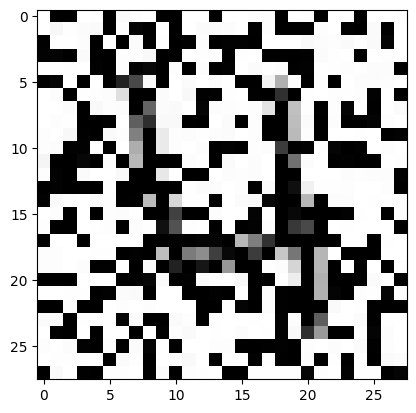

In [33]:
plt.imshow(X[3], cmap=plt.cm.binary)
plt.show()

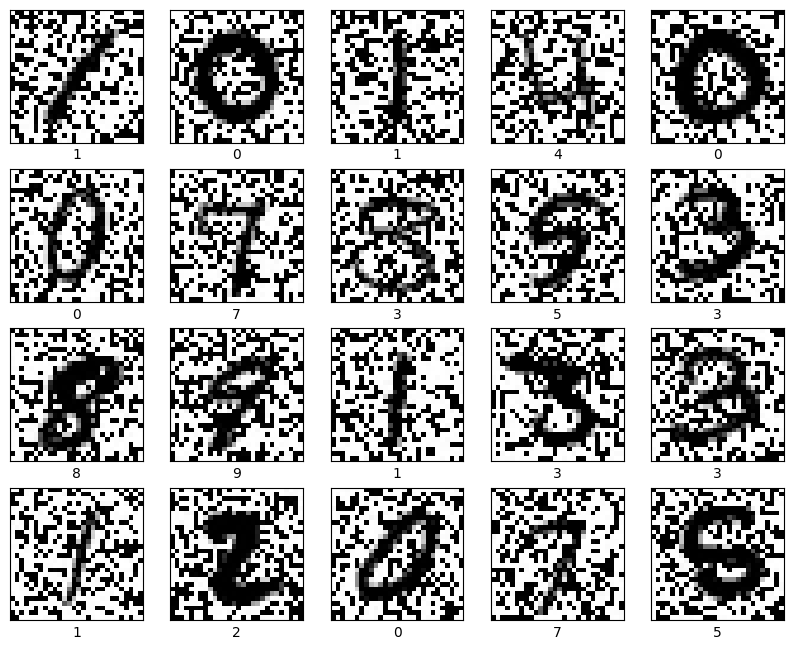

In [34]:
import math
numbers_to_display = 20
num_cells = math.ceil(math.sqrt(numbers_to_display))

plt.figure(figsize = (10, 10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X[i], cmap=plt.cm.binary)
    plt.xlabel(np.argmax(Y[i]))
# plt.show()

In [35]:
augmented_df.to_csv('../data/gaussian.csv', index=False)